<a href="https://colab.research.google.com/github/MuskanManandhar03/Python_Fundamentals_Assignment/blob/main/python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style="whitegrid")

In [28]:
# Inserting dataset
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")



In [29]:
# Converting Total Charges to numeric, handling errors
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Deleting rows with missing values
data = data.dropna(subset=['tenure'])
data = data.dropna(subset=['MonthlyCharges'])
data = data.dropna(subset=['Churn'])
data = data.dropna(subset=['TotalCharges'])



In [34]:

data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [35]:
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


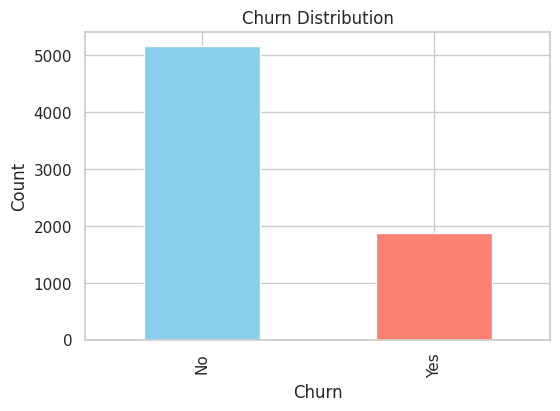

In [ ]:
# Churn distribution
plt.figure(figsize=(6, 4))
data['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()

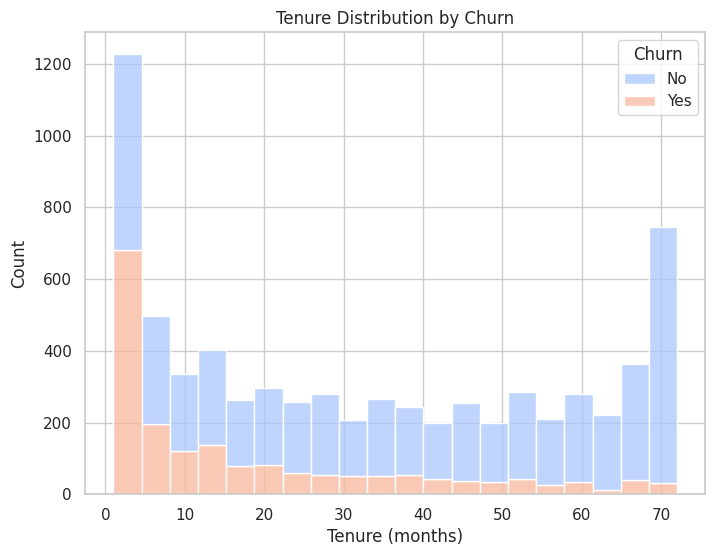

In [ ]:
# Tenure vs Churn
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='tenure', hue='Churn', multiple='stack', palette='coolwarm', bins=20)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()



<ipython-input-16-6a052011f4b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y='MonthlyCharges', palette='coolwarm')


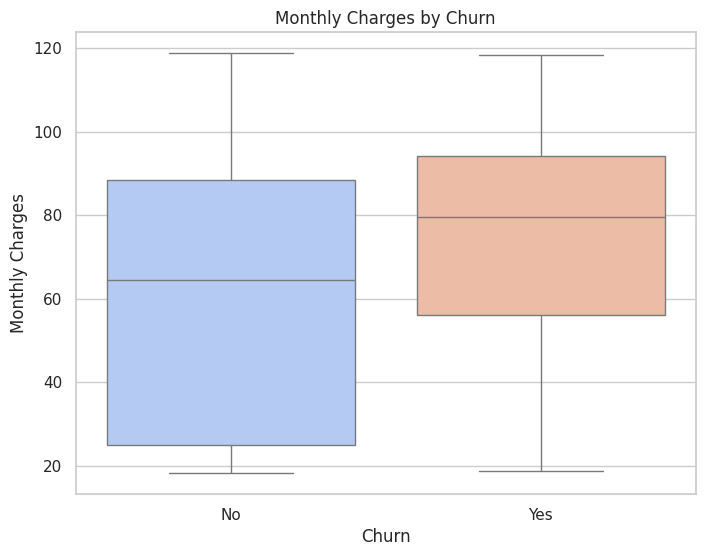

In [ ]:
# Visualize monthly charges vs churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Churn', y='MonthlyCharges', palette='coolwarm')
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

In [ ]:
# Encode categorical variables
data_encoded = data.copy()
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                'PaperlessBilling', 'PaymentMethod', 'Churn']


In [30]:
# Scale numerical variables
scaler = StandardScaler()
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges ']
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])



In [31]:
# Split data into features and target
X = data_encoded.drop(columns=['customerID', 'Churn'])
y = data_encoded['Churn']


In [32]:

# Train-test
train_size = int(0.8 * len(data_encoded))
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

In [33]:
# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[926 100]
 [177 204]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1026
           1       0.67      0.54      0.60       381

    accuracy                           0.80      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407

